In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


11493376/11490434 [==============================] - 0s 0us/step
Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)


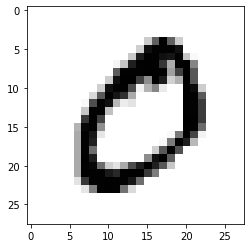

In [ ]:
mnistDB = keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnistDB.load_data()
print("Shape of X_train: ", X_train.shape)

print("Shape of X_test: ", X_test.shape)

plt.imshow(X_train[1], cmap='binary')
plt.show()

In [ ]:
X_train = X_train.reshape((60000, 28,28,1))
X_train = X_train.astype('float32')/255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32')/255
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (60000, 28, 28, 1)
Shape of X_test:  (10000, 28, 28, 1)


In [ ]:
cnnModel_MNIST = keras.models.Sequential()
cnnModel_MNIST.add(keras.layers.Conv2D(32, (3,3), activation="relu",input_shape=X_train.shape[1:]))
cnnModel_MNIST.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_MNIST.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
cnnModel_MNIST.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_MNIST.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
cnnModel_MNIST.add(keras.layers.Flatten())
cnnModel_MNIST.add(keras.layers.Dense(64, activation="relu"))
cnnModel_MNIST.add(keras.layers.Dense(32, activation="relu"))
cnnModel_MNIST.add(keras.layers.Dense(10, activation="softmax"))


cnnModel_MNIST.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________

In [ ]:
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
cnnModel_MNIST.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
cnnModel_MNIST.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10,batch_size=16)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 18s 335us/sample - loss: 0.1552 - acc: 0.9521 - val_loss: 0.0464 - val_acc: 0.9855
Epoch 2/10
54000/54000 [==============================] - 11s 208us/sample - loss: 0.0534 - acc: 0.9841 - val_loss: 0.0466 - val_acc: 0.9862
Epoch 3/10
54000/54000 [==============================] - 11s 210us/sample - loss: 0.0386 - acc: 0.9887 - val_loss: 0.0487 - val_acc: 0.9877
Epoch 4/10
54000/54000 [==============================] - 11s 208us/sample - loss: 0.0292 - acc: 0.9912 - val_loss: 0.0336 - val_acc: 0.9913
Epoch 5/10
54000/54000 [==============================] - 11s 202us/sample - loss: 0.0227 - acc: 0.9931 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 6/10
54000/54000 [==============================] - 12s 216us/sample - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0324 - val_acc: 0.9903
Epoch 7/10
54000/54000 [==============================] - 11s 209us/sample - loss: 0.0179 - acc: 0.9946 -

In [ ]:
test_loss, test_accuracy = cnnModel_MNIST.evaluate(x=X_test, y=y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.0404 - acc: 0.9905


In [ ]:
print(test_loss, test_accuracy)

0.040374795614301455 0.9905
